In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as mt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import export_text, plot_tree
from sklearn.model_selection import GridSearchCV

In [3]:
# Dosyayı oku
data = pd.read_excel(r"C:\Users\ilayd\OneDrive\Masaüstü\winequality-red.xls")

In [4]:
# Veri seti hakkında genel bilgi
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [5]:
# Veri setinin ilk birkaç satırı
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#Veri setinin betimsel istatistikleri
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


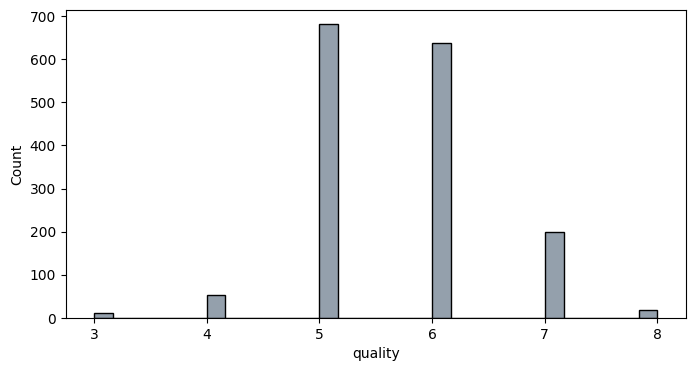

In [7]:
#Şarap kalitelerinin görselleştirilmesi
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(data=data, x='quality', stat='count', color='slategray')
ax.grid(False)

In [8]:
# Öznitelikler (features) ve hedef (target) değişkenini ayırdım
X = data.drop('quality', axis=1) 
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluşturma
model = DecisionTreeClassifier(random_state=42)

# Modeli eğitme
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
# Tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk oranını hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Oranı: {accuracy:.2f}")

# Sınıflandırma raporu ve karmaşıklık matrisini görüntüleme
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("Karmaşıklık Matrisi:\n", confusion_matrix(y_test, y_pred))


Doğruluk Oranı: 0.56
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.55      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.55      0.56      0.55       320

Karmaşıklık Matrisi:
 [[ 0  0  0  1  0  0]
 [ 0  0  5  5  0  0]
 [ 1  4 88 35  2  0]
 [ 0  3 40 70 17  2]
 [ 0  1  5 14 21  1]
 [ 0  0  1  3  1  0]]


In [10]:
# Özelliklerin önem derecelerini değerlendirin
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

# Özelliklerin önem derecelerini görüntüleyin
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.4f}')

fixed acidity: 0.0799
volatile acidity: 0.0936
citric acid: 0.0805
residual sugar: 0.0788
chlorides: 0.0788
free sulfur dioxide: 0.0757
total sulfur dioxide: 0.1007
density: 0.0818
pH: 0.0737
sulphates: 0.1023
alcohol: 0.1540


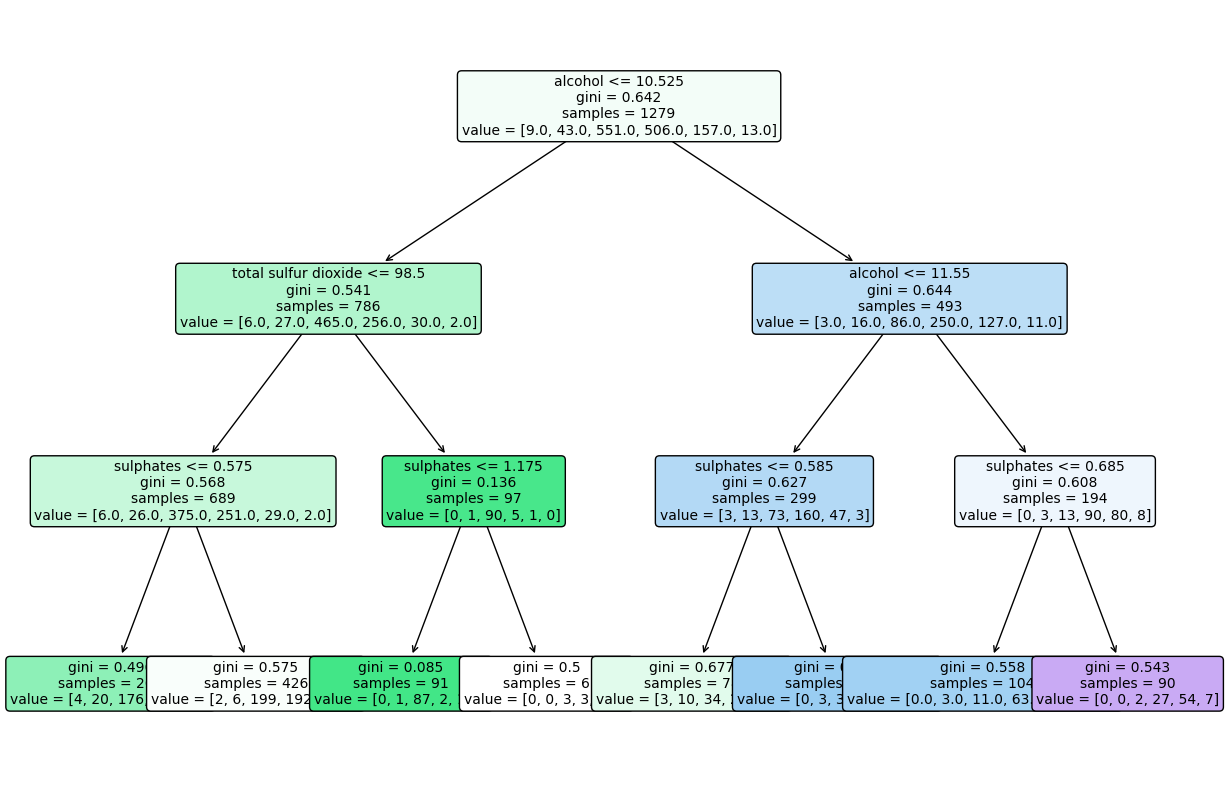

[Text(0.5, 0.875, 'alcohol <= 10.525\ngini = 0.642\nsamples = 1279\nvalue = [9.0, 43.0, 551.0, 506.0, 157.0, 13.0]'), Text(0.25, 0.625, 'total sulfur dioxide <= 98.5\ngini = 0.541\nsamples = 786\nvalue = [6.0, 27.0, 465.0, 256.0, 30.0, 2.0]'), Text(0.125, 0.375, 'sulphates <= 0.575\ngini = 0.568\nsamples = 689\nvalue = [6.0, 26.0, 375.0, 251.0, 29.0, 2.0]'), Text(0.0625, 0.125, 'gini = 0.496\nsamples = 263\nvalue = [4, 20, 176, 59, 4, 0]'), Text(0.1875, 0.125, 'gini = 0.575\nsamples = 426\nvalue = [2, 6, 199, 192, 25, 2]'), Text(0.375, 0.375, 'sulphates <= 1.175\ngini = 0.136\nsamples = 97\nvalue = [0, 1, 90, 5, 1, 0]'), Text(0.3125, 0.125, 'gini = 0.085\nsamples = 91\nvalue = [0, 1, 87, 2, 1, 0]'), Text(0.4375, 0.125, 'gini = 0.5\nsamples = 6\nvalue = [0, 0, 3, 3, 0, 0]'), Text(0.75, 0.625, 'alcohol <= 11.55\ngini = 0.644\nsamples = 493\nvalue = [3.0, 16.0, 86.0, 250.0, 127.0, 11.0]'), Text(0.625, 0.375, 'sulphates <= 0.585\ngini = 0.627\nsamples = 299\nvalue = [3, 13, 73, 160, 47, 3]

In [11]:
# Karar ağacı modelini belirli hiperparametrelerle eğitme
model = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)

# Karar ağacını görselleştir
fig, ax = plt.subplots(figsize=(15, 10))
tree_plot = plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=10, ax=ax)

plt.show()
print(tree_plot)

In [14]:
parametreler = {"max_depth": range(1,10)}
grid = GridSearchCV(model, param_grid = parametreler, cv = 5, n_jobs = -1)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 1}
model= DecisionTreeClassifier(random_state = 0,
                           max_depth = 1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_test = model.score(X_test, y_test)

print("Accuracy: {}".format(model_test))

{'max_depth': 4}
Accuracy: 0.53125
